# Disciplina: Ciência de Dados
## Pacote Scikit-learn - Aprendizagem supervisionada

Prof. Luiz Affonso Guedes 

## Conteúdo:
- Aprendizagem Supervisonada de máquina
- Pacote Scikit-learn
- Classificação
    - K-NN
    - Classificador Bayesiano
    - Regressão Logística
    - Árvore de Decisão
    - Random Frorest
- Regressão
    - Regressão Linear

# Estrutura Geral do Processo
- Carregar pacotes
- Definir modelo de aprendizagem/predição
- Carregar dados
- Preparar dados (features, target) - para o caso supervisionado (são arrays numPy)
- Separar dados de Treinamento e de Teste
- Binarizar os dados
- Fazer aprendizagem
    - Para classificação utilizar método MODELO_ESCOLHIDO.fit(parametros) 
    - Para predição utilizar método MODELO_ESCOLHIDO.predict(parametros)
- Avaliação do modelo


### 1. Introdução ao pacote SciKit-Learn
- Princípios de funcionamento.


In [0]:
# O Pacote Seaborn possui o dataset Iris
# O método .load_set(.) retorna um dataFrame.

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


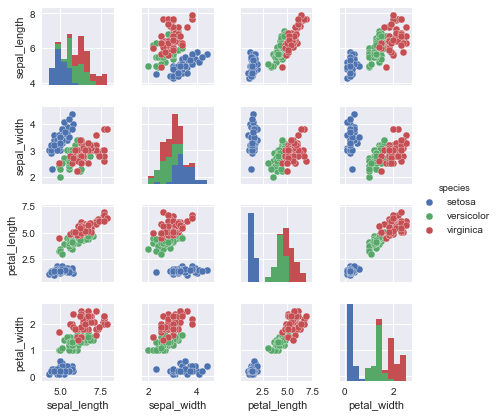

In [0]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Para se usar o Scikit-Learn, nós iremos extrair a matriz de features e o array target a partir do DataFrame.

In [0]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [0]:
y_iris = iris['species']
y_iris.shape

#### 1.1 Utilizando o pacote Sklearn
Este pacote já possui o dataset 'iris'. Notar que as variáveis feature e target são do tipo numPy array (bidimensional e unidimensional, respectivamente).

In [0]:
# Exemplo de verificação do dataset Iris do pacote Scikit-learn

# Pacote scikitlearn (classe datasets)
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
iris = datasets.load_iris()
print(type(iris))

print(iris.keys())

<class 'sklearn.datasets.base.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [0]:
# Verificação dos tipos dos dados do dataset Iris

print(type(iris.data))
print(type(iris.target))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:

iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [0]:
iris.data.shape

(150, 4)

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Como as variáveis de data (features) são tipos numpy, iremos convertê-las para Dataframe Pandas.

In [0]:
# Convertendo para DataFrame
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


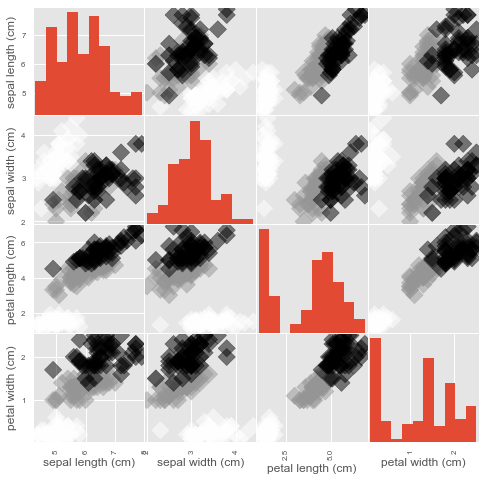

In [0]:
pd.scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')
plt.show()

### 1.2 Exercício
Acesse o site do UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

- dados sobre os votos dos congressistas americanos.

O objetivo é predizer o partido do congressista ('Democrat' ou 'Republican') baseda somente nos votos deles.
 

In [0]:
#dados1 = pd.read_csv('arquivo_congresso.txt', header = None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
Renomeie os nomes das colunas
7. Attribute Information:
   0. party: 2 (democrat, republican)
   1. infants: 2 (y,n)
   2. water: 2 (y,n)
   3. budget: 2 (y,n)
   4. physician: 2 (y,n)
   5. salvador: 2 (y,n)
   6. religious: 2 (y,n)
   7. satellite: 2 (y,n)
   8. aid: 2 (y,n)
  9.  missile: 2 (y,n)
  10. immigration: 2 (y,n)
  11. synfuels: 2 (y,n)
  12. education: 2 (y,n)
  13. superfund: 2 (y,n)
  14. crime: 2 (y,n)
  15. duty-free-exports: 2 (y,n)
  16. eaa_rsa: 2 (y,n)

Transforme os dados para binários:
- y --> 0
- n --> 1
- democrat --> 0
- republican --> 1

In [0]:
# Trate os missing data
# Sugestão - utilize um sistema de descarte simples


In [0]:
# Transformação dos dados categóricos para binários



In [0]:
# Exercutar o seguinte programa
import seaborn as sns
sns.set()

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Repita o procedimento para variáveis 'satellite'e 'missile'

Qual é a sua conclusão?

In [0]:
# Análise para a variável 'satellite'
import seaborn as sns
sns.set()
????


In [0]:
# Análise para a variável 'missile'
import seaborn as sns
sns.set()
????

## 2. Classificação
- K-NN
- Naive-Bayesian
- Árvore de Decisão
- Random Florest
- Regressão Logística
- SVM
- ...

### 2.1 Algoritmo K-NN

Procedimento padrão:
- importar classificador a partir do pacote 'sklearn'
- carregar o dataframe
- Obter os arrays (numPy) de características (features - bidimensional) e target (unidimensional)
- Binarizar os dados
- Escolher conjuntos de treinamento e conjunto de teste
- Fazer o treinamento (método .fit(X_train, y_train))
- Analisar Resultado (avaliação via métodos .predict(X_new) ou .score(X_test))

#### 2.1.1 Exemplo com o Dataset 'iris'.

The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary. It contains keys and values:
    


In [0]:
# Carregamento do dataset 'iris' a partir do Pacote sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [0]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The value of the key DESCR is a short description of the dataset. We show the beginning of the description here (feel free to look up the rest yourself):



In [0]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The value of the key target_names is an array of strings, containing the species of flower that we want to predict:


In [0]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of feature_names is a list of strings, giving the description of each feature:

In [0]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [0]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [0]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


The target array contains the species of each of the flowers that were measured, also
as a NumPy array:


In [0]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


target is a one-dimensional array, with one entry per flower:

In [0]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [0]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 2.1.1.a Training and Testing Data

This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.


scikit-learn contains a function that shuffles the dataset and splits it for you: the
train_test_split function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set. Deciding how much data you want to put into the training and the test set respectively is somewhat
arbitrary, but using a test set containing 25% of the data is a good rule of thumb.


In scikit-learn, data is usually denoted with a capital X, while labels are denoted by
a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics,
where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a
matrix) and a lowercase y because the target is a one-dimensional array (a vector).
Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'],
                                                    random_state=0)

The output of the train_test_split function is X_train, X_test, y_train, and
y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

In [0]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [0]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### 2.1.1.b Fiting Model
All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k-nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we
will set any parameters of the model. The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1:


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels:


In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### 2.1.1.c Making Predictions
We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [0]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a twodimensional
NumPy array, as scikit-learn always expects two-dimensional arrays
for the data.
To make a prediction, we call the predict method of the knn object:


In [0]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
        iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### 2.1.1.d Evaluating the Model
This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted:

In [0]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [0]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [0]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


#### 2.1.1.e Reviewing
This gave us the confidence to apply the model to new data (in our example, new
flower measurements) and trust that the model will be correct about 97% of the time.
Here is a summary of the code needed for the whole training and evaluation
procedure:


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
      iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [0]:
# test data set with 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    test_size = 0.2, random_state=42, stratify=y)

# Training with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


#### 2.1.2 - Exercício com a Base de Dados de Votos de Congressitas Americanos.
- Exemplo de treinamento com todo o conjunto de dados.

In [0]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
# Numpy arrays
#df = DADOS DOS CONGRESSISTAS

y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X, y)

Exemplo de treinamento com todo o conjunto de dados:
- predição com um dado do conjunto treinado.
- predição com um dado não treinado.

In [0]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party',axis=1).values

# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
X_new = [0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1]
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

#### 2.1.2.a Conjunto de Treinamento e Conjunto de Teste
- Separação da base em dois grupos: treinamento e teste
    - Treinar com conjunto de teste: .fit(X_train, y_train)
    - Analisar a acurácia com o conjuto de teste: .score(X_test, y_test)

In [0]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

# Create feature and target arrays


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

O que ocorre com o desempenho do K-NN se se aumenta o percentual do conjunto de treinamento?
- quanto ao tempo de processamento?
- quanto à precisão do treinamento?

*Para avaliar o tempo de processamento, use %timeit.

#### 2.1.2.b - Overfitting and underfitting
Analisar o que ocorre se aumentar o parâmetro k.
- quanto à precisão.
- quanto ao desempenho computacional.

*Para avaliar o tempo de processamento, use %timeit.

In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 2.1.3 Exercício para casa: Homework

Utilize a base de dado de dígitos do MNIST:

site: http://yann.lecun.com/exdb/mnist/

O SciKit-Learn possui uma base dados simplificada.

- Trate a base de dados, como variáveis features e target. 
- Separe os conjuntos de treinamento e teste (use o parâmetro test_size = 0.2).
- Treine como algorítmos K-NN, para k= 1,3,5,7.
- Obtenha os escores dos resultados para esses valores de k.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

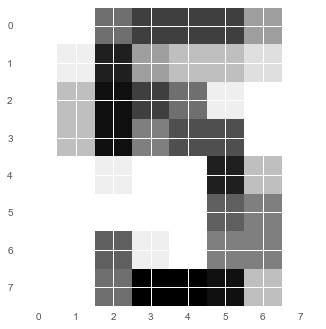

In [0]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

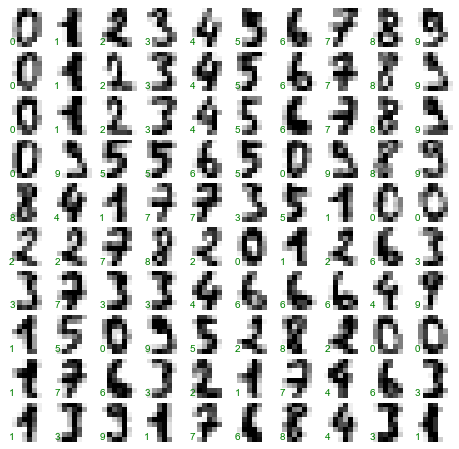

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [0]:
# Exercício de Casa - Homework

